<a href="https://colab.research.google.com/github/adrianfr10/forecasting-analysis-semantics-assignments/blob/master/Task_3_Analysis_of_product_semantics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Data for analysis contains "review comment message" column which will be the focus of this analysis. The aim of this process is to classify the sentiment of the messages and assign the labels of either "positive", "neutral" or "negative". The model will be trained on already assigned scores on a scale 1 - 5 that are present in the "review_score" column. We consider scores 1 and 2 to be negative, score 3 to be neutral and 4,5 to be positive.

PREPARING DATA

In [2]:
reviews = pd.read_csv('order_reviews.csv', encoding='utf-8')
# converting type to string
reviews['review_comment_message'] = reviews['review_comment_message'].astype(str)
reviews = reviews.loc[reviews['review_comment_message'] != 'nan'].reset_index(drop=True)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reviews['review_comment_message'])
sequences = tokenizer.texts_to_sequences(reviews['review_comment_message'])
data = pad_sequences(sequences, maxlen=50)

SPLITTING DATA INTO TRAINING AND TEST SETS

In [3]:
from sklearn.model_selection import train_test_split
labels = pd.get_dummies(reviews['review_score']).values
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

## Recursive Neural Networks
&nbsp;&nbsp;&nbsp;&nbsp;  The idea behind RNNs is using sequential data. In traditional neural networks we assume that all inputs and outputs are independent of each other. Oftentimes using this assumption is not beneficial because we don’t have any information about the previous states. For example when we want to predict next word in a sentence, it would be useful to know what words came before it. This type of neural networks is called recursive, because they perform the same task for each element of the sequence and the output depends on previous calculations. We can also think of RNNs as having a "memory" that captures information about what has been calculated so far.
RNNs have great potential in a lot of applications, for example this type of neural networks is commonly used in time series forecasting, to predict stock prices, NLP (natural language processing) for automatic translation, speech-to-text and sentiment analysis.<br>

## LSTM
&nbsp;&nbsp;&nbsp;&nbsp;Particular kind of RNNs are LSTM - Long-Short Term Memory. This kind of neural networks can retain long-term dependencies in sequential data. They utilize memory cells and gates to choose which information to keep and which to discard. This helps to eliminate the vanishing gradient problems that RNNs are dealing with.<br>

Because of this I'm going to use RNNs and LSTM in this problem, as presented below.




MODEL CREATION

In [5]:
model = Sequential()
model.add(Embedding(5000, 100, input_length=50))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL TRAINING

In [6]:
# As the dataset is quite large, this process may take up to an hour.
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
979/979 - 137s - loss: 0.9166 - accuracy: 0.6693 - val_loss: 0.8484 - val_accuracy: 0.6936 - 137s/epoch - 140ms/step
Epoch 2/10
979/979 - 124s - loss: 0.8041 - accuracy: 0.7072 - val_loss: 0.8421 - val_accuracy: 0.6920 - 124s/epoch - 127ms/step
Epoch 3/10
979/979 - 119s - loss: 0.7604 - accuracy: 0.7213 - val_loss: 0.8581 - val_accuracy: 0.6888 - 119s/epoch - 122ms/step
Epoch 4/10
979/979 - 124s - loss: 0.7198 - accuracy: 0.7365 - val_loss: 0.8740 - val_accuracy: 0.6838 - 124s/epoch - 127ms/step
Epoch 5/10
979/979 - 126s - loss: 0.6772 - accuracy: 0.7550 - val_loss: 0.9207 - val_accuracy: 0.6743 - 126s/epoch - 128ms/step
Epoch 6/10
979/979 - 127s - loss: 0.6356 - accuracy: 0.7705 - val_loss: 0.9690 - val_accuracy: 0.6695 - 127s/epoch - 130ms/step
Epoch 7/10
979/979 - 128s - loss: 0.5994 - accuracy: 0.7842 - val_loss: 0.9999 - val_accuracy: 0.6679 - 128s/epoch - 131ms/step
Epoch 8/10
979/979 - 127s - loss: 0.5626 - accuracy: 0.7984 - val_loss: 1.0532 - val_accuracy: 0.6698 - 

PREDICTION

In [7]:
predictions = model.predict(X_test)
print(predictions)

327/327 [==============================] - 6s 18ms/step
[[8.84233937e-02 1.35523418e-03 2.43560923e-03 2.09767167e-02
  8.86809051e-01]
 [2.52535820e-01 1.39198795e-01 4.03137475e-01 9.79585573e-02
  1.07169189e-01]
 [6.63565621e-02 1.70100052e-02 5.59204221e-01 3.16995651e-01
  4.04334553e-02]
 ...
 [4.85289318e-04 2.46273557e-04 1.49059331e-03 2.39107795e-02
  9.73866999e-01]
 [1.52448425e-02 7.46429386e-03 8.57588947e-02 8.66190493e-01
  2.53414754e-02]
 [6.11587286e-01 1.76692098e-01 1.51981309e-01 4.45930287e-02
  1.51462806e-02]]


RESULTS OF MODEL IMPLEMENTATION

In [16]:
# Function used to classify manually given comment
def classify_sentiment(comment: str) -> str:
    # Tokenizing comment
    comment_sequence = tokenizer.texts_to_sequences([comment])
    comment_data = pad_sequences(comment_sequence, maxlen=50)

    # Sentiment classification
    sentiment_probabilities = model.predict(comment_data)

    # Choosing highest value as prediction
    sentiment_label = np.argmax(sentiment_probabilities)
    print(sentiment_label)
    return 'Negative' if sentiment_label in [1, 2] else 'Neutral' if sentiment_label == 3 else "Positive"

MODEL TESTING ON GIVEN COMMENTS

In [17]:
print(classify_sentiment("compra muito boa"))
print(classify_sentiment("tem um desempenho satisfatório e o preço é baixo"))
print(classify_sentiment("não poderia ter sido bom"))
print(classify_sentiment("bom"))
# Here test your comments by invoking classify_sentiment function as above

1/1 [==============================] - 0s 28ms/step
4
Positive
1/1 [==============================] - 0s 26ms/step
4
Positive
1/1 [==============================] - 0s 29ms/step
1
Negative
1/1 [==============================] - 0s 27ms/step
3
Neutral


PRODUCTS WITH THE BEST/WORST REVIEWS


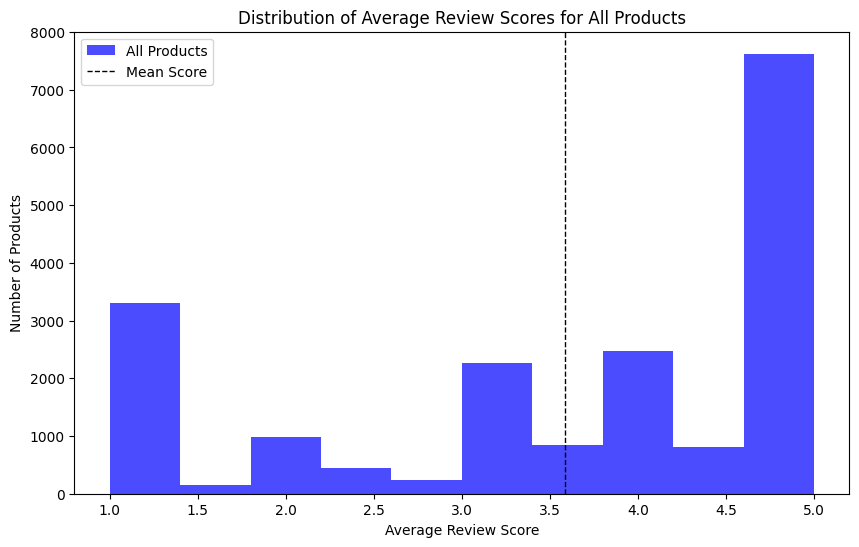

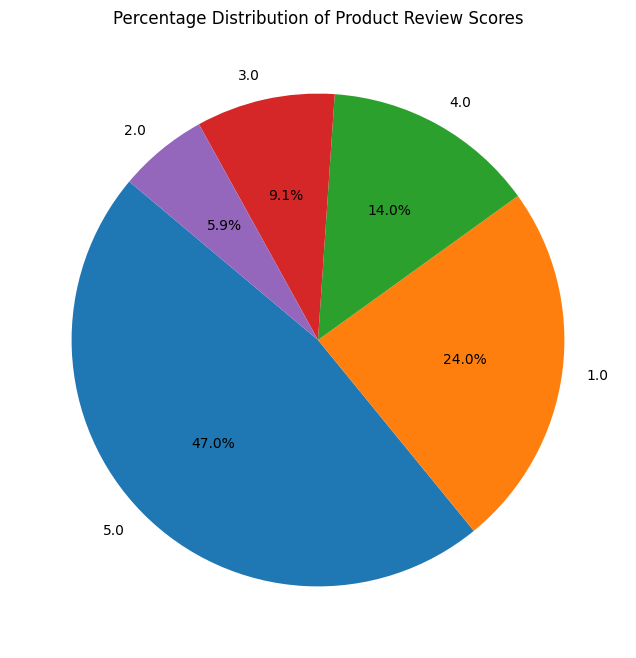

In [19]:
order_items = pd.read_csv('order_items.csv', encoding='utf-8')
# order_reviews = pd.read_csv('order_reviews.csv', encoding='utf-8')
# Merge order_items and order_reviews
df = pd.merge(order_items, reviews,on='order_id',how='left')

# Calculating average scores for every product
average_scores = df.groupby('product_id')['review_score'].mean()
average_scores.rename(index={'1':'avg_review_score'}, inplace=True)

# Getting products with the worst reviews (considered ones with review score between 1 and 2)
bottom_products = average_scores[(average_scores >= 1) & (average_scores < 2)]

# Getting products with the best reviews (review score 5)
top_products = average_scores[average_scores == 5]

# Histogram of avg scores for all products
plt.figure(figsize=(10, 6))
plt.hist(average_scores, bins=10, color='blue', alpha=0.7, label='All Products')
plt.axvline(x=average_scores.mean(), color='black', linestyle='dashed', linewidth=1, label='Mean Score')
plt.xlabel('Average Review Score')
plt.ylabel('Number of Products')
plt.title('Distribution of Average Review Scores for All Products')
plt.legend()
plt.show()

# Pie chart for percentage distribution of review scores
review_counts = df['review_score'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Product Review Scores')
plt.show()

SELLERS WHO ONLY COLLECT NEGATIVE FEEDBACK

                          seller_id  avg_review_score
0  0015a82c2db000af6aaaf3ae2ecb0532          1.000000
1  001e6ad469a905060d959994f1b41e4f          1.000000
2  010da0602d7774602cd1b3f5fb7b709e          1.000000
3  02a2272692e13558373c66db98f05e2e          1.000000
4  058cb5aeb36d7c0fcae20fc85d5e0a59          1.800000
5  0725b8c0f3f906e58f70cbe76b7c748c          1.882353
6  0791d9fc1e30678ecf03d3e55fa108d3          1.000000
7  0aa124728afc1131dff5655f4c6f487b          1.000000
8  0aa2205ca24f113f4658a5c536667426          1.000000
9  0d83f8e03188682112cc0d93523705cc          1.800000


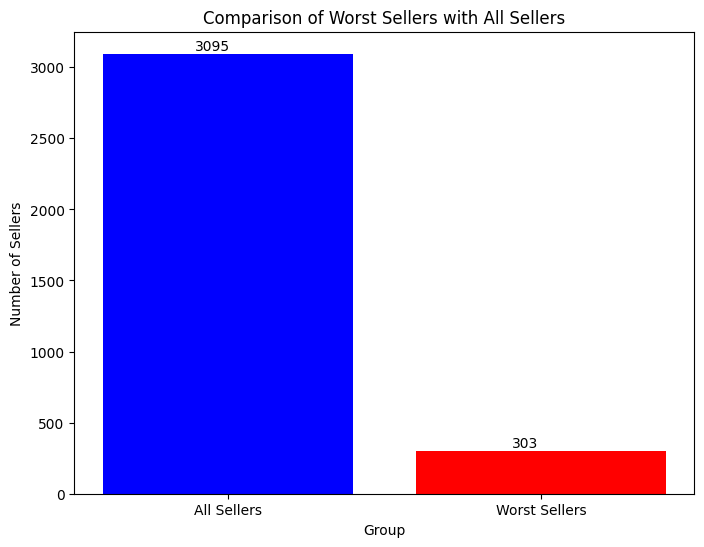

Ratio of worst sellers to all sellers: 0.10


In [20]:
sellers_with_reviews = df[['seller_id','review_score']]

# Calculating mean review score for every seller
seller_avg_score = sellers_with_reviews.groupby('seller_id')['review_score'].mean().reset_index()
seller_avg_score.rename(columns={'review_score':'avg_review_score'}, inplace=True)
# Getting sellers with average review score between 1 and 2 - considered the worst
worst_sellers = seller_avg_score[(seller_avg_score['avg_review_score'] >= 1) & (seller_avg_score['avg_review_score'] < 2)].reset_index(drop=True)
# Sample of data from worst sellers
print(worst_sellers.head(10))

# Plotting the worst sellers against all sellers
plt.figure(figsize=(8, 6))
plt.bar(['All Sellers', 'Worst Sellers'], [len(seller_avg_score), len(worst_sellers)], color=['blue', 'red'])
plt.text(-0.05, len(seller_avg_score) + 100, f'{len(seller_avg_score)}', ha='center', va='top')
plt.text(0.95, len(worst_sellers) + 100, f'{len(worst_sellers)}', ha='center', va='top')
plt.xlabel('Group')
plt.ylabel('Number of Sellers')
plt.title('Comparison of Worst Sellers with All Sellers')
plt.show()

# Calculating worst sellers to all sellers ratio
worst_sellers_ratio = len(worst_sellers) / len(seller_avg_score)
print(f'Ratio of worst sellers to all sellers: {worst_sellers_ratio:.2f}')

For highlighting price entity, Named Entity Recognition (NER) will be used. It is a NLP technique, that helps to recognise entities in text not only its existence but also recognise various contexts that the entity is used in. For example Tesla is a name of the company, but also a surname of a famous engineer and inentor Nikola Tesla.<br> This technique helps to differentiate between various contexts and analyse results for various use cases. For example we have to highlight the price entity, so the analytical department looks through this information for mentions of the competitors' prices.<br>
For this task, SpaCy library will be used and its NLP tools.

In [21]:
import spacy
# Downloading portuguese SpaCy model
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 71.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
# Load portuguese language model
nlp = spacy.load("pt_core_news_sm")
# Keywords list about price in portuguese
price_keywords = ["preço", "custo", "valor"]

# Function for processing comment with NRE
def highlight_price_mentions(comment: str) -> str:
    doc = nlp(comment)
    highlighted_comment = comment
    for token in doc:
        if token.text.lower() in price_keywords:
            highlighted_comment = highlighted_comment.replace(token.text, f"[PRICE: {token.text}]")
    return highlighted_comment

# Apply function to comments and put it in a Series
highlighted_comments = pd.Series(reviews['review_comment_message'].apply(highlight_price_mentions))


In [23]:
highlighted_comments.to_csv('highlighted_comments.csv')